In [50]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [ ]:
# Variáveis do arquivo .env
load_dotenv()

True

In [ ]:
# Conexão com o Banco de Dados 
usuario = os.getenv("DB_USER")
senha = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
nome_do_banco = os.getenv("DB_NAME")

engine = create_engine(
    f"postgresql+psycopg2://{usuario}:{senha}@{host}:{port}/{nome_do_banco}"
)

In [74]:
df_financeiro = pd.read_sql_query("SELECT * FROM financeiro", engine)
df_servico = pd.read_sql_query("SELECT * FROM servico", engine)

In [75]:
df = pd.merge(df_servico, df_financeiro, on="servico_id", how="inner")

In [76]:
df["lucro_prejuizo"] = df["lucro"] - df["prejuizo"]
df = df.dropna(subset=["lucro_prejuizo"])

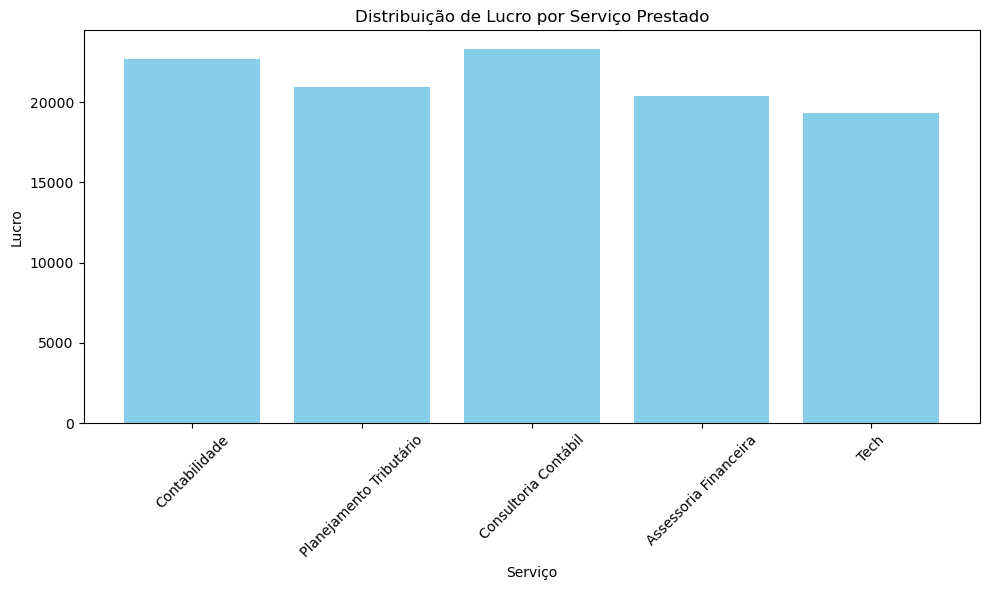

In [79]:
plt.figure(figsize=(10, 6))
plt.bar(df["nome_servico"], df["lucro"], color="skyblue")
plt.xlabel("Serviço")
plt.ylabel("Lucro")
plt.title("Distribuição de Lucro por Serviço Prestado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()